In [227]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [228]:
def load_data_from_csv(file_path):
    """
    Load Open Interest data from CSV file.
    :param file_path: Path to the CSV file.
    :return: DataFrame containing Open Interest data.
    """
    return pd.read_csv(file_path, skiprows=1)

In [229]:
def parse_data_from_csv(file_path):
    """
    Parse Open Interest data from CSV file.
    :param file_path: Path to the CSV file.
    :return: Dictionary containing FII, PRO, and Client positions.
    """
    df = load_data_from_csv(file_path)
    df.head()
    columns_mapping = {
    "Client Type": "Participant Type",
    "Future Index Long": "LongFut", "Future Index Short": "ShortFut",
    "Option Index Call Long": "LongCall", "Option Index Call Short": "ShortCall",
    "Option Index Put Long": "LongPut", "Option Index Put Short": "ShortPut"
    }
    df = df.rename(columns=columns_mapping)
    df.columns = df.columns.str.replace(r"\s+", " ", regex=True) 
    df.columns = df.columns.str.strip()  # Removes unwanted spaces & tabs
    df.columns = [re.sub(r'[^A-Za-z0-9 ]+', '', col) for col in df.columns]
    df["FutRatio"] = df["LongFut"] / df["ShortFut"]
    return df

In [230]:
def plot_futures_graph(participant_type, data, type):
    """
    Plot the Open Interest of Index Futures for a given client type.
    :param client_type: Client type (FII, PRO, or Client).
    :param data: Dictionary containing FII, PRO, and Client positions.
    """
    long_fut = data.loc[data["Participant Type"] == participant_type, "LongFut"].iloc[0]
    short_fut = data.loc[data["Participant Type"] == participant_type, "ShortFut"].iloc[0]
    categories = ["Long Futures", "Short Futures"]  # Labels for bars
    values = [long_fut, short_fut]
    
    plt.figure(figsize=(6, 4))  # Set figure size

    plt.bar(categories, values, color=['blue', 'red'])
    plt.ylabel("Value")
    plt.title(f"{participant_type} Long and Short Futures - {type}")
    # Show plot
    plt.show()

In [231]:
def plot_fut_long_to_short_ratio(df_open_interest, type):
    # Plotting the ratio
    plt.figure(figsize=(10, 6))
    # Define colors based on the ratio
    colors = ['blue' if ratio > 1 else 'red' if ratio < 1 else 'grey' for ratio in df_open_interest["FutRatio"]]
    for i, ratio in enumerate(df_open_interest["FutRatio"]):
        plt.text(i, ratio, f'{ratio:.2f}', ha='center', va='bottom')
    plt.bar(df_open_interest["Participant Type"], df_open_interest["FutRatio"], color=colors)
    plt.xlabel('Participant Type')
    plt.ylabel('Ratio of Long Futures to Short Futures')
    plt.title(f'Comparison of Long to Short Futures Ratio for Participants - {type}')
    plt.show()

In [232]:

def plot_total_contracts(data, type):
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]  
    
    # Extract total long and short contracts (excluding 'TOTAL' row)
    total_long = data["Total Long Contracts"][:-1]  
    total_short = data["Total Short Contracts"][:-1]  
    
    indices = np.arange(len(participant_types))  # X-axis positions
    width = 0.4  # Width of bars
    
    plt.figure(figsize=(10, 5))  # Set figure size
    
    # Plot bars side by side
    plt.bar(indices - width/2, total_long, width, color='blue', label='Total Long Contracts\t')
    plt.bar(indices + width/2, total_short, width, color='red', label='Total Short Contracts')
    
    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Number of Contracts")
    plt.title(f"Total Long vs Short Contracts by Participant Type - {type}")
    plt.xticks(indices, participant_types, rotation=45)  # Rotate x-axis labels for clarity
    plt.legend()
    
    # Show the plot
    plt.show()

In [233]:
def plot_total_long_short_contract_ratio(data,type):
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]  
    # Extract total long and short contracts (excluding 'TOTAL' row)
    total_long = data["Total Long Contracts"][:-1]  
    total_short = data["Total Short Contracts"][:-1]  
    long_short_ratio = total_long / total_short  # Calculate the ratio
    indices = np.arange(len(participant_types))  # X-axis positions
    colors = ['blue' if ratio > 1 else 'red' if ratio < 1 else 'grey' for ratio in long_short_ratio]
    plt.figure(figsize=(10, 5))  # Set figure size
    for i, ratio in enumerate(long_short_ratio):
        plt.text(i, ratio, f'{ratio:.2f}', ha='center', va='bottom')
    plt.bar(indices, long_short_ratio, color=colors)
    plt.xlabel('Participant Type')
    plt.ylabel('Long/Short Contracts Ratio')
    plt.title(f'Long to Short Contracts Ratio by Participant Type - {type}')
    plt.xticks(indices, participant_types, rotation=45)  # Rotate x-axis labels for clarity
    plt.axhline(1, color='black', linewidth=0.8)  # Add horizontal line at 1
    plt.show()
    

In [234]:
def plot_net_options(data, type):
    # (call long + put short)-(call short + put long)
    # Compute Net Options for each participant
    net_options = (data["LongCall"] + data["ShortPut"]) - (data["ShortCall"] + data["LongPut"])
    
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]
    net_options = net_options[:-1]  # Exclude 'TOTAL' row
    
    indices = np.arange(len(participant_types))  # X-axis positions
    
    plt.figure(figsize=(10, 5))  # Set figure size
    
    # Define colors based on net options value
    colors = ['green' if value > 0 else 'red' for value in net_options]
    
    # Plot bar chart
    plt.bar(participant_types, net_options, color=colors, label="Net Options")
    
    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Net Options Value")
    plt.title(f"Net Options Position by Participant Type - {type}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.axhline(0, color='black', linewidth=0.8)  # Add horizontal line at 0
    plt.legend()
    
    # Show the plot
    plt.show()

In [235]:
def plot_net_options_long_to_short_ratio(data, type):
    # (call long + put short)-(call short + put long)
    # Compute Net Options for each participant
    net_options_ratio = (data["LongCall"] + data["ShortPut"]) / (data["ShortCall"] + data["LongPut"])
    
    # Extract participant types (excluding 'TOTAL' row)
    participant_types = data["Participant Type"][:-1]
    net_options_ratio = net_options_ratio[:-1]  # Exclude 'TOTAL' row
    
    indices = np.arange(len(participant_types))  # X-axis positions
    plt.figure(figsize=(10, 5))  # Set figure size

    # Define colors based on net options value
    colors = ['green' if value > 1 else 'red' for value in net_options_ratio]
    
    for i, value in enumerate(net_options_ratio):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

    # Plot bar chart
    plt.bar(participant_types, net_options_ratio, color=colors, label="Net Options Long/Short Ratio")

    # Labels and title
    plt.xlabel("Participant Type")
    plt.ylabel("Net Options Long/Short Ratio")
    plt.title(f"Net Options Long to Short Ratio by Participant Type - {type}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.axhline(1, color='black', linewidth=0.8)  # Add horizontal line at 1
    plt.legend()
    
    # Show the plot
    plt.show()

In [236]:
current_date='11022025'
OPEN_INTEREST_PATH = f'./data/fao_participant_oi_{current_date}.csv'
TRADING_VOLUME_PATH = f'./data/fao_participant_vol_{current_date}.csv'
TYPE = {
    'OPEN_INTEREST': 'Open Interest',
    'TRADING_VOLUME' : 'Trading Volume'
}

In [237]:
print(OPEN_INTEREST_PATH)
print(TRADING_VOLUME_PATH)

./data/fao_participant_oi_11022025.csv
./data/fao_participant_vol_11022025.csv


In [238]:
df_open_interest = parse_data_from_csv(OPEN_INTEREST_PATH)
df_open_interest.head()


,Participant Type,LongFut,ShortFut,Future Stock Long,Future Stock Short,LongCall,LongPut,ShortCall,ShortPut,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,FutRatio
0,Client,247832,101371,2587179,316601,3129276,1824215,3132280,2173601,2502581,735587,1140126,931996,11026670,7795975,2.444802
1,DII,68319,52564,228866,4119358,70,14247,0,0,4734,0,373705,0,316236,4545627,1.299730
2,FII,36747,221195,3442298,2317411,637865,692555,586643,479464,223025,252156,514669,290914,5284646,4410296,0.166129
3,Pro,52296,30064,798217,303190,1197906,974654,1246194,852607,858121,980773,1559961,745606,4861967,4737622,1.739489
4,TOTAL,405194,405194,7056560,7056560,4965117,3505671,4965117,3505671,3588461,1968516,3588461,1968516,21489520,21489520,1.000000


In [239]:
df_trading_volume = parse_data_from_csv(TRADING_VOLUME_PATH)
df_trading_volume.head()

,Participant Type,LongFut,ShortFut,Future Stock Long,Future Stock Short,LongCall,LongPut,ShortCall,ShortPut,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,FutRatio
0,Client,95874,94594,377365,365565,11762111,11379304,11678021,11389444,1353750,781801,1203148,832346,25750205,25563118,1.013532
1,DII,4041,0,67040,97420,0,0,0,372,400,0,11750,0,71481,109542,inf
2,FII,17714,28676,341727,356942,2863385,3075275,2861504,3057262,690954,507529,710806,524150,7496584,7539340,0.617729
3,Pro,67037,61396,657520,623725,24174808,23422220,24260779,23429721,2383565,1782206,2502965,1715040,52487356,52593626,1.091879
4,TOTAL,184666,184666,1443652,1443652,38800304,37876799,38800304,37876799,4428669,3071536,4428669,3071536,85805626,85805626,1.000000


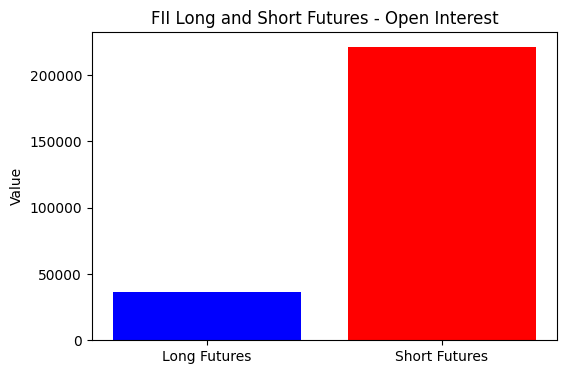

In [240]:
plot_futures_graph("FII", df_open_interest, TYPE["OPEN_INTEREST"])

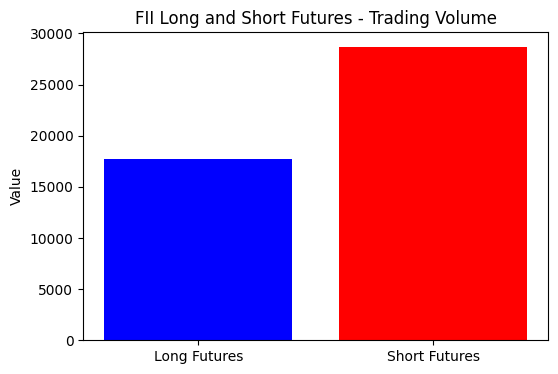

In [241]:
plot_futures_graph("FII", df_trading_volume, TYPE["TRADING_VOLUME"])

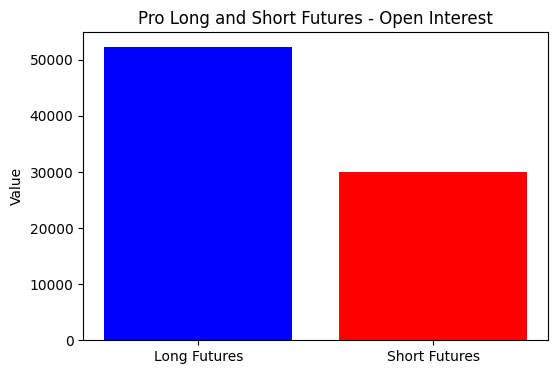

In [242]:
plot_futures_graph("Pro", df_open_interest, TYPE["OPEN_INTEREST"])

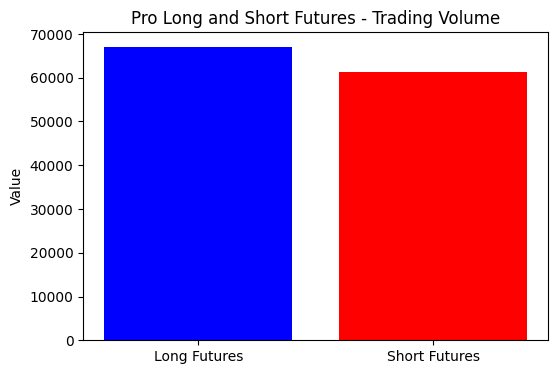

In [243]:
plot_futures_graph("Pro", df_trading_volume, TYPE["TRADING_VOLUME"])

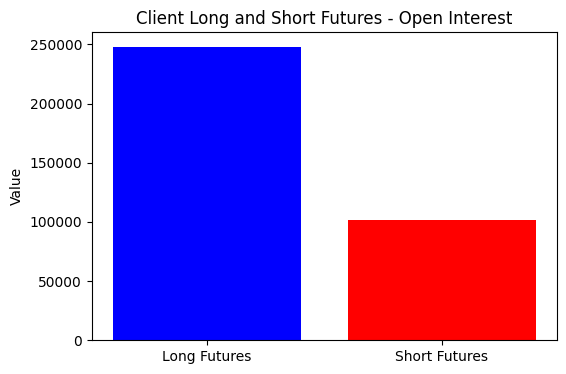

In [244]:
plot_futures_graph("Client", df_open_interest, TYPE["OPEN_INTEREST"])

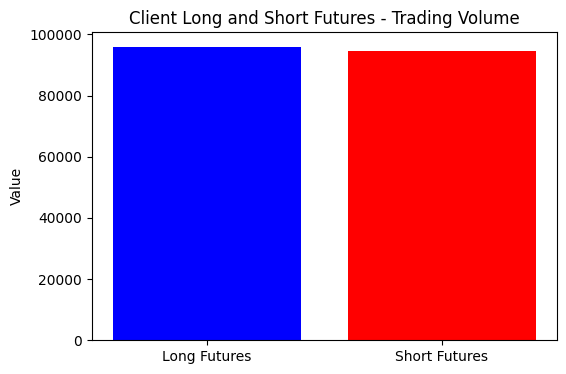

In [245]:
plot_futures_graph("Client", df_trading_volume, TYPE["TRADING_VOLUME"])

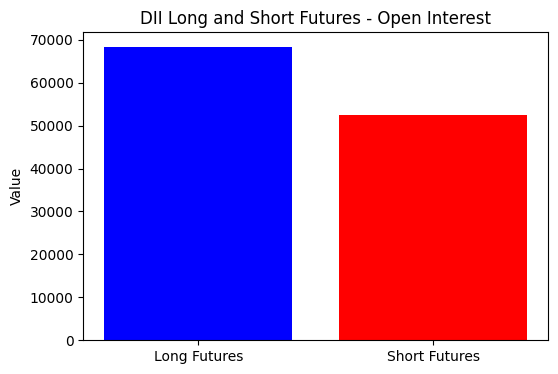

In [246]:
plot_futures_graph("DII", df_open_interest, TYPE["OPEN_INTEREST"])

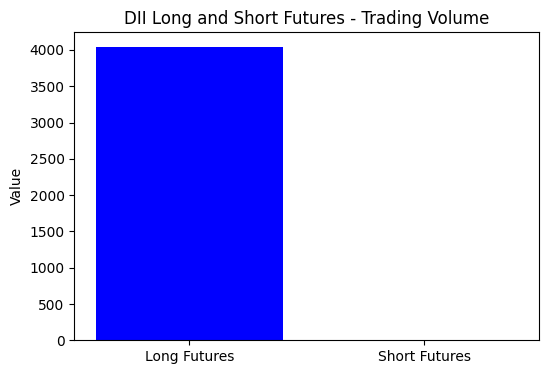

In [247]:
plot_futures_graph("DII", df_trading_volume, TYPE["TRADING_VOLUME"])

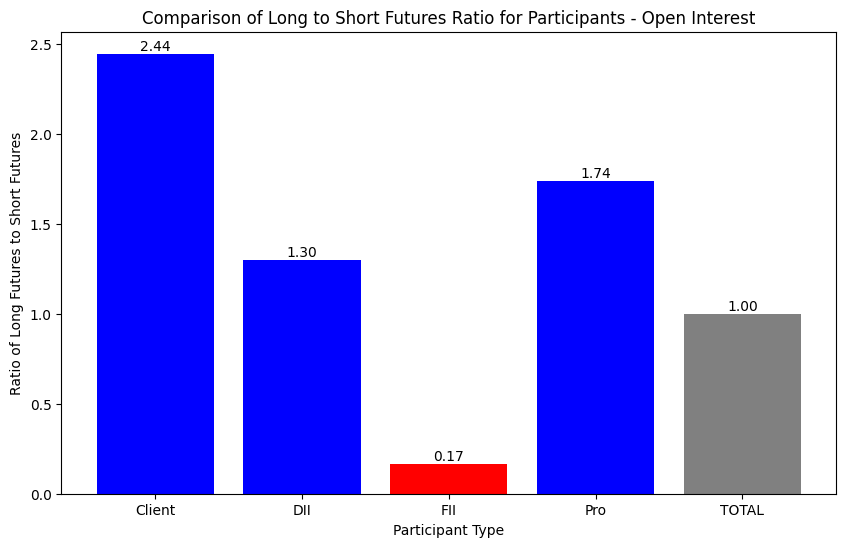

In [248]:
plot_fut_long_to_short_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

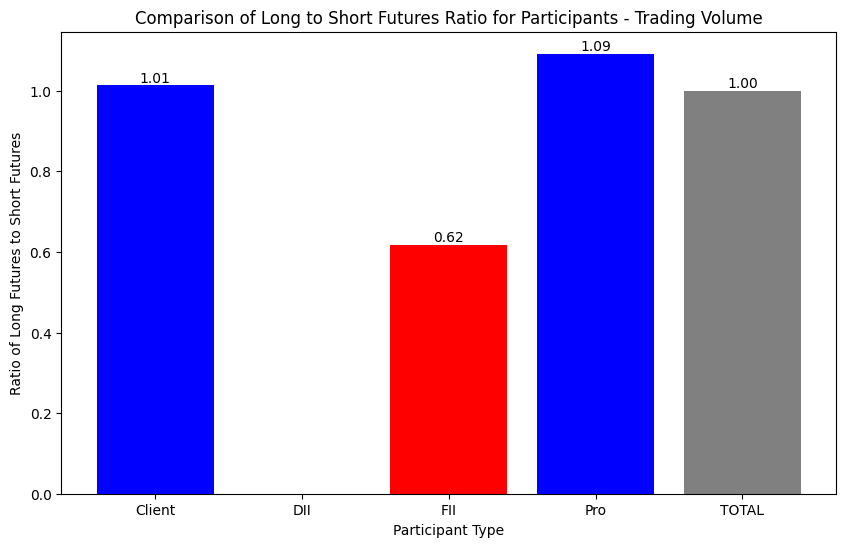

In [249]:
plot_fut_long_to_short_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])

/Users/Z009TZW/Documents/my_files/trade_formula/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


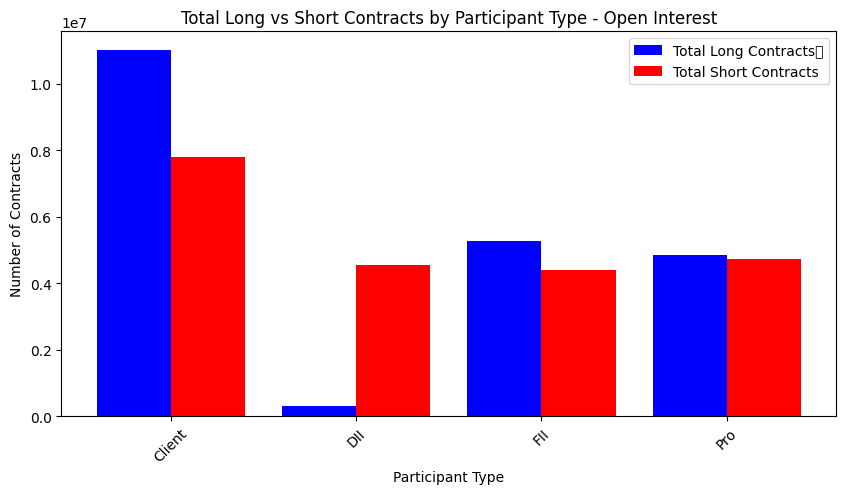

In [250]:
plot_total_contracts(df_open_interest, TYPE["OPEN_INTEREST"])

/Users/Z009TZW/Documents/my_files/trade_formula/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


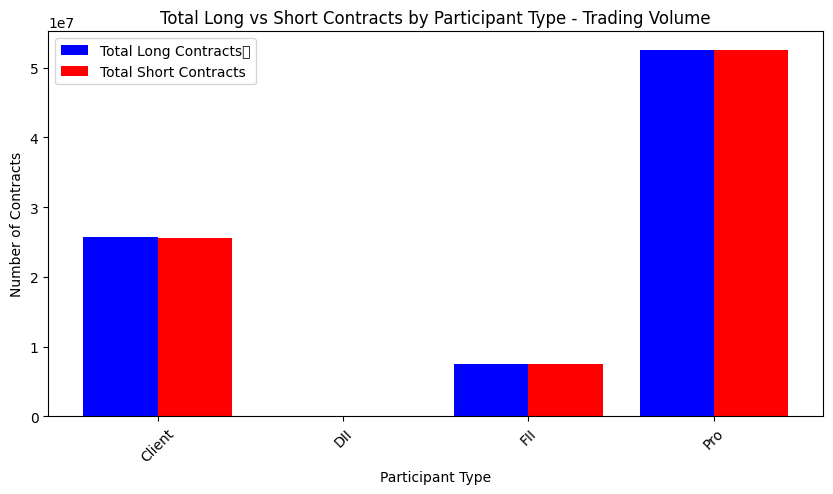

In [251]:
plot_total_contracts(df_trading_volume, TYPE["TRADING_VOLUME"])

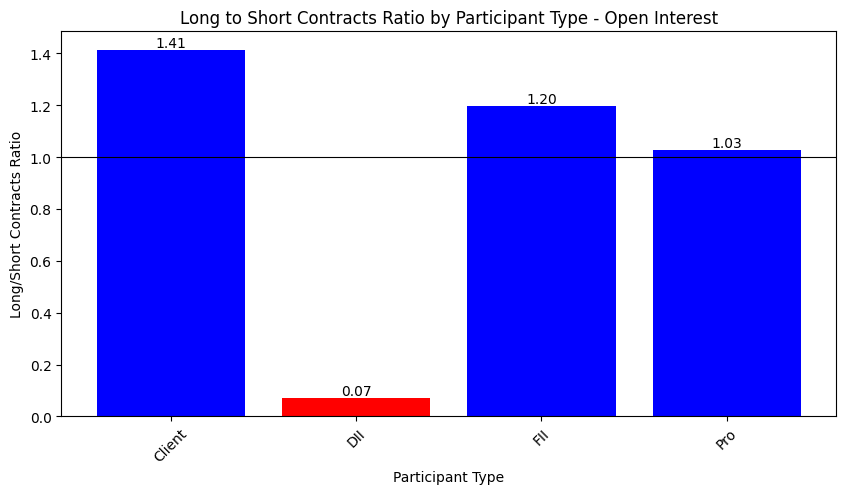

In [252]:
plot_total_long_short_contract_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

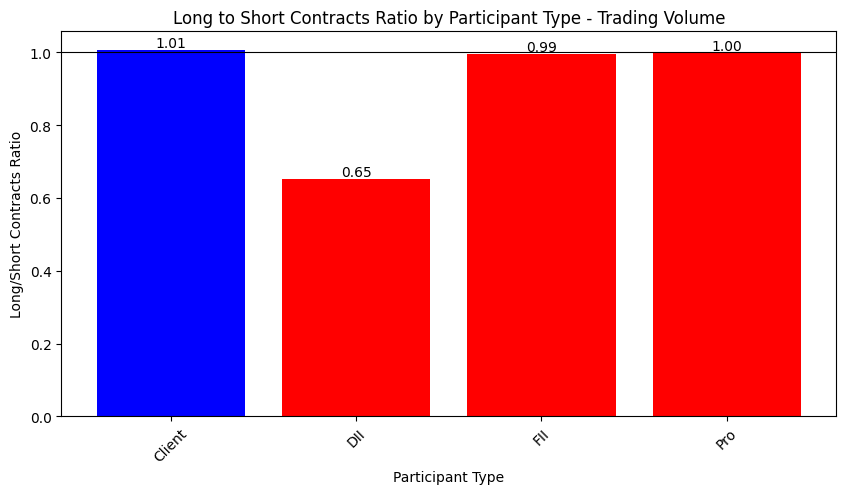

In [253]:
plot_total_long_short_contract_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])

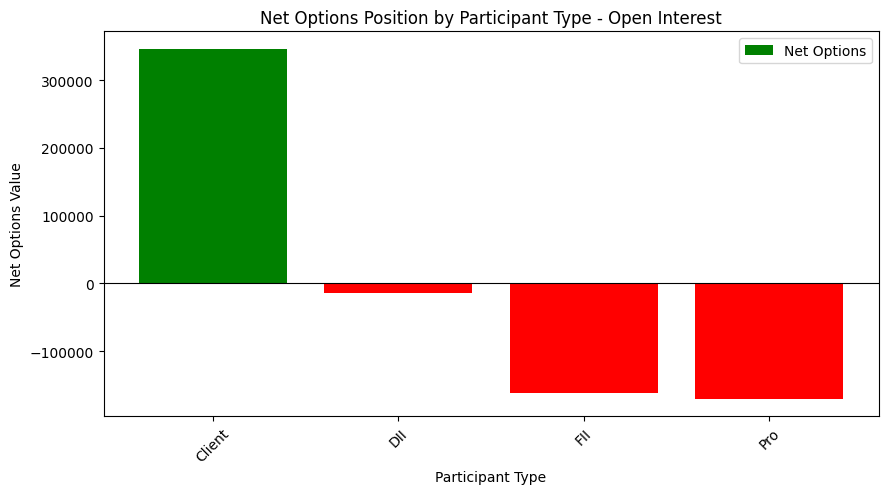

In [254]:
plot_net_options(df_open_interest, TYPE["OPEN_INTEREST"])

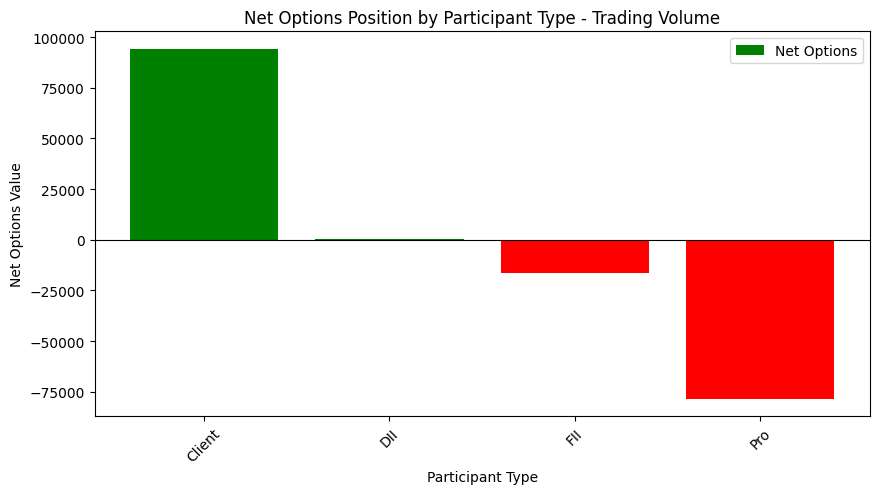

In [255]:
plot_net_options(df_trading_volume, TYPE["TRADING_VOLUME"])

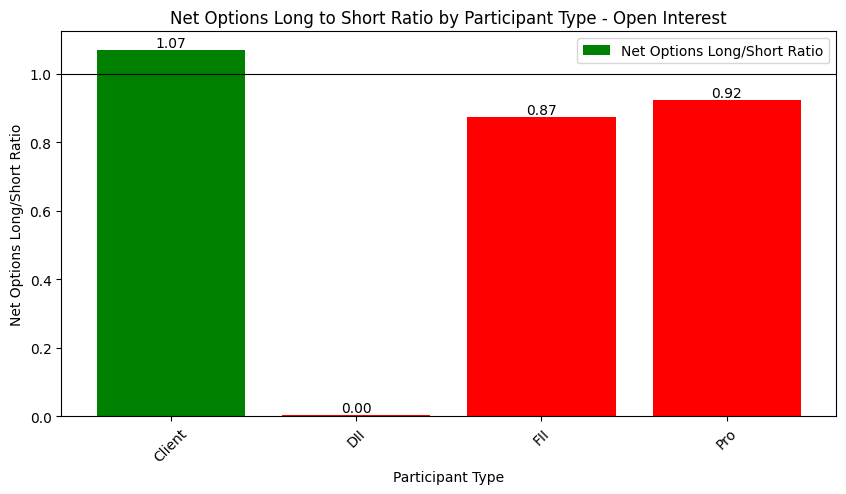

In [256]:
plot_net_options_long_to_short_ratio(df_open_interest, TYPE["OPEN_INTEREST"])

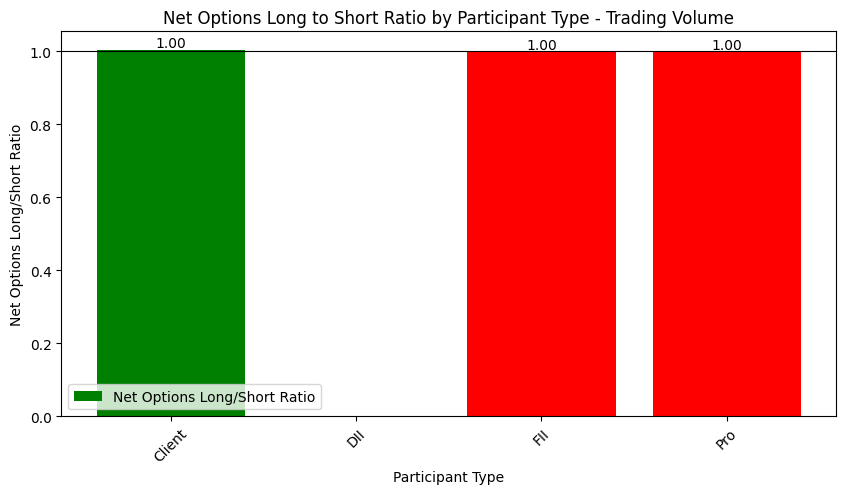

In [257]:
plot_net_options_long_to_short_ratio(df_trading_volume, TYPE["TRADING_VOLUME"])